# Atividades

1) Leia uma imagem colorida, transforme a mesma em níveis de cinza e salve o resultado em disco. 

In [2]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.io import imsave
from skimage.color import rgb2gray
import numpy as np
from skimage.filters import sobel,roberts,prewitt,scharr
import skimage
from skimage.util import random_noise
from skimage.restoration import denoise_nl_means, denoise_wavelet, denoise_bilateral
from skimage.filters import threshold_mean, threshold_minimum, threshold_triangle, threshold_otsu

In [11]:
imagem = imread('lenna.jpg')
imagem.shape

(220, 220, 3)

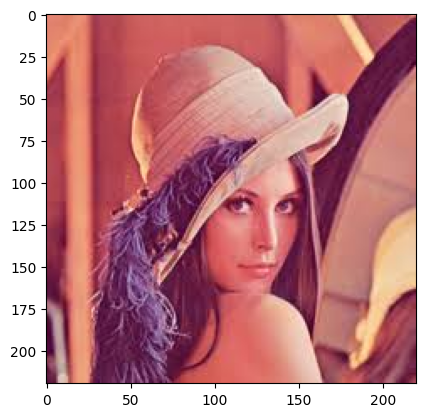

In [12]:
plt.imshow(imagem)

In [14]:
cinza = rgb2gray(imagem)

Text(0.5, 1.0, 'Imagens em Níveis de Cinza')

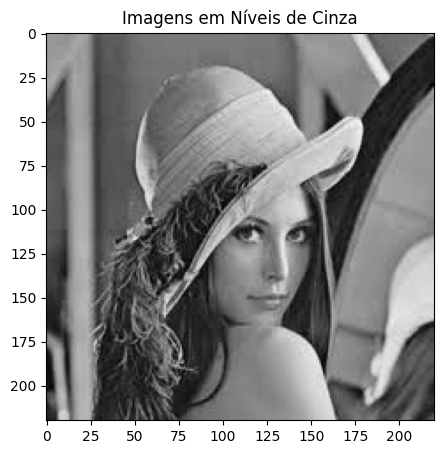

In [15]:
plt.figure(figsize=(5,10))
plt.imshow(cinza,cmap='gray')
plt.title('Imagens em Níveis de Cinza')

In [19]:
cinza.shape

(220, 220)

In [16]:
imsave('lennaCinza.png',cinza)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


2) Leia uma imagem colorida, transforme a mesma em níveis de cinza. Após isso, atribua o valor zero a todos os pixels cujo vizinho à direita tenha o mesmo valor de intensidade. Salve o resultado em disco.

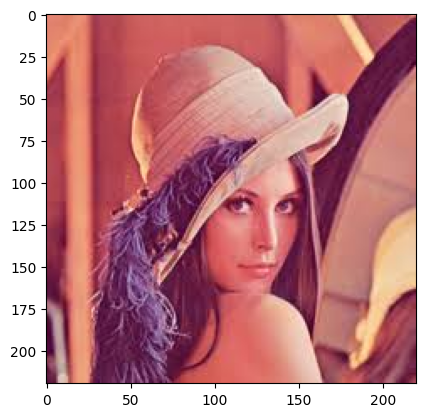

In [18]:
imagem = imread('lenna.jpg')
plt.imshow(imagem)

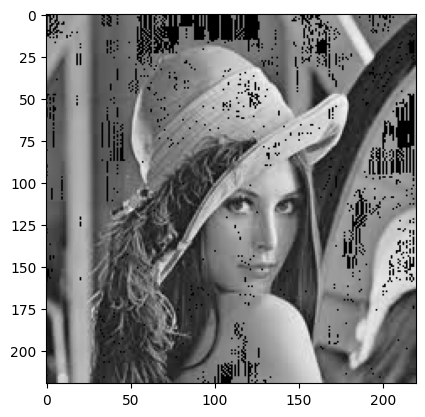

In [40]:
linhas = cinza.shape[0]
colunas = cinza.shape[1]

for l in range(linhas):
  for c in range(colunas -1):
    if (cinza[l, c] == cinza[l, c+1]):
      cinza[l, c] = 0

plt.imshow(cinza, cmap='gray')



In [41]:
imsave('cinza2questao.jpg',cinza)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


3) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB. Calcule a maior e menor intensidade dos pixels em cada componente.

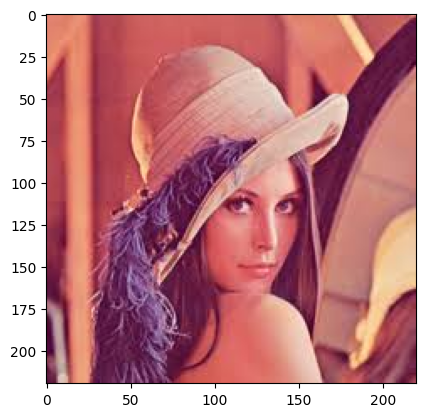

In [42]:
imagem = imread('lenna.jpg')
plt.imshow(imagem)

In [49]:
red = imagem[:,:,0]
green = imagem[:,:,1]
blue = imagem[:,:,2]

In [59]:
linhasRed = red.shape[0]
colunasRed = red.shape[1]
linhasGreen = green.shape[0]
colunasGreen = green.shape[1]
linhasBlue = blue.shape[0]
colunasBlue = blue.shape[1]

maiorRed = 0
menorRed = 225

maiorGreen = 0
menorGreen = 225

maiorBlue = 0
menorBlue = 225

In [62]:
for l in range(linhasRed):
  for c in range(colunasRed):
    if (red[l, c] > maiorRed):
      maiorRed = red[l, c]
    if (red[l, c] < menorRed):
      menorRed = red[l, c]


for l in range(linhasGreen):
  for c in range(colunasGreen):
    if (green[l, c] > maiorGreen):
      maiorGreen = green[l, c]
    if (green[l, c] < menorGreen):
      menorGreen = green[l, c]

for l in range(linhasBlue):
  for c in range(colunasBlue):
    if (blue[l, c] > maiorBlue):
      maiorBlue = blue[l, c]
    if (blue[l, c] < menorBlue):
      menorBlue = blue[l, c]

print('Maior Red: ', maiorRed)
print('Menor Red: ', menorRed)
print('Maior Green: ', maiorGreen)
print('Menor Green: ', menorGreen)
print('Maior Blue: ', maiorBlue)
print('Menor Blue: ', menorBlue)

Maior Red:  255
Menor Red:  45
Maior Green:  241
Menor Green:  0
Maior Blue:  239
Menor Blue:  5


4) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB.  Atribua o valor 255 a todos os pixels com intensidade maior que 150, faça isso em cada componente. Após isso, junte as componentes para formar uma imagem colorida novamente e salve o resultado.

In [77]:
for l in range(linhasRed):
  for c in range(colunasRed):
    if (red[l, c] > 150):
      red[l, c] = 225


for l in range(linhasGreen):
  for c in range(colunasGreen):
    if (green[l, c] > 150):
      green[l, c] = 225

for l in range(linhasBlue):
  for c in range(colunasBlue):
    if (blue[l, c] > 150):
      blue[l, c] = 225

novaImagem = np.dstack((red, green, blue))

Text(0.5, 1.0, 'Imagem Nova')

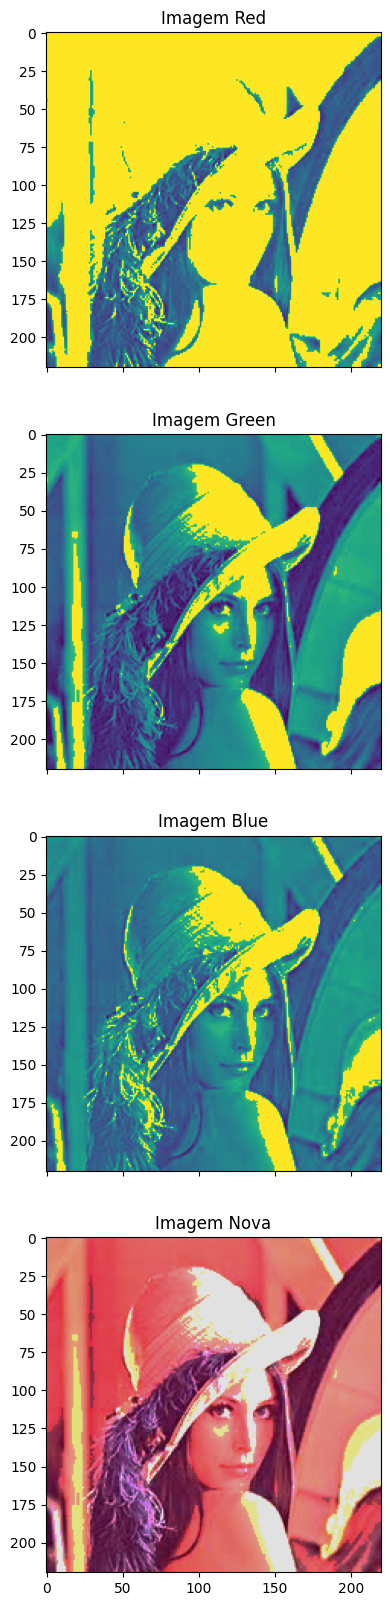

In [88]:
fig, ax = plt.subplots(4,1,figsize=(20, 20),sharex=True)
ax[0].imshow(red)
ax[0].set_title('Imagem Red')
ax[1].imshow(green)
ax[1].set_title('Imagem Green')
ax[2].imshow(blue)
ax[2].set_title('Imagem Blue')
ax[3].imshow(novaImagem)
ax[3].set_title('Imagem Nova')

5) Aplique ruído em uma imagem utilizando a função "skimage.util.random_noise" com os seguites parâmentros: ‘s&p’, ‘gaussian’ e ‘speckle’. Cada um desses parâmetros irá gerar uma imagem com ruído. Após isso, aplique funções disponíveis em 'skimage.restoration' para recuperar as imagens.

In [ ]:
skimage.util.random_noise(imagem, mode='gaussian', seed=None, clip=True)

In [98]:
imagem = imread('lenna.jpg')

In [101]:
imagem = rgb2gray(imagem)

In [102]:
ruido = random_noise(imagem, 's&p')
ruido1 = random_noise(imagem, 'gaussian')
ruido2 = random_noise(imagem, 'speckle')

Text(0.5, 1.0, 'Speckle')

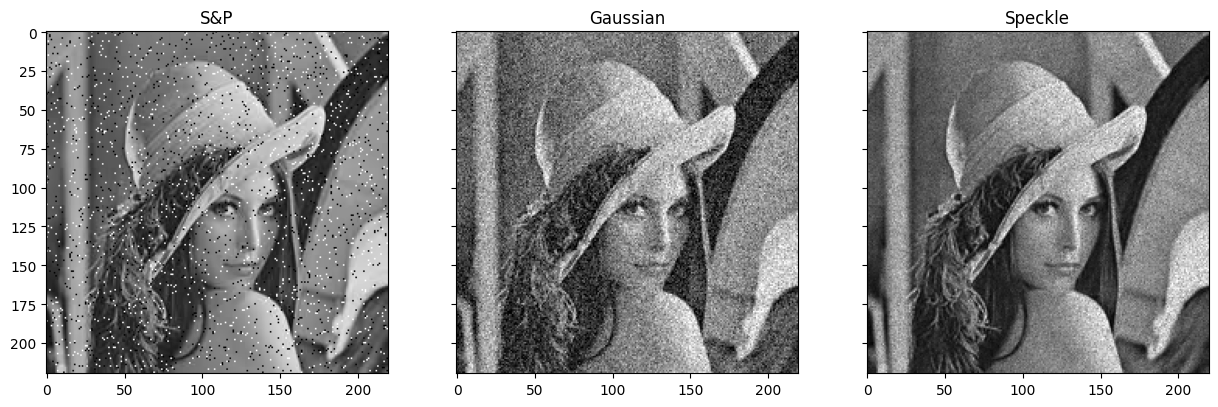

In [103]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 15))

axes[0].imshow(ruido, cmap = 'gray')
axes[0].set_title('S&P')

axes[1].imshow(ruido1, cmap = 'gray')
axes[1].set_title('Gaussian')

axes[2].imshow(ruido2, cmap = 'gray')
axes[2].set_title('Speckle')

In [106]:
ruido = denoise_nl_means(imagem)
ruido1 = denoise_nl_means(imagem)
ruido2 = denoise_nl_means(imagem)

Text(0.5, 1.0, 'Speckle')

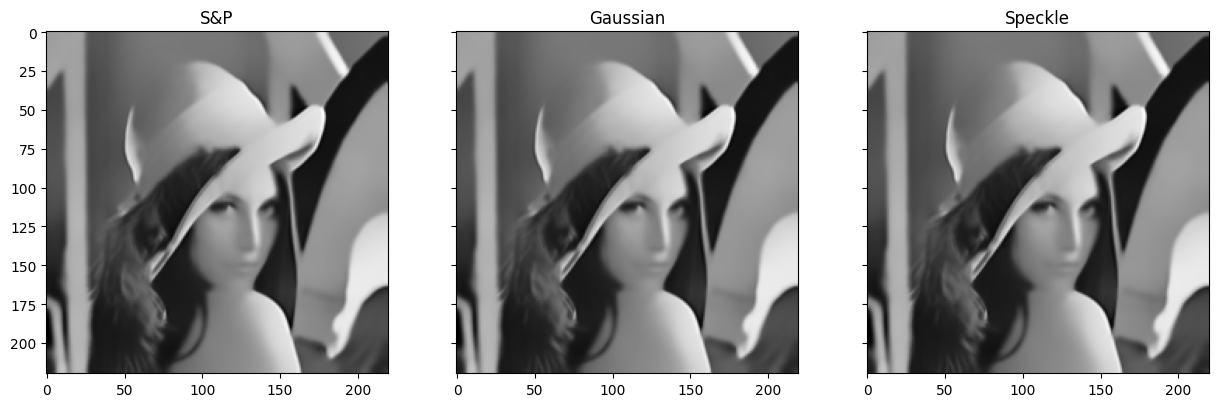

In [107]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 15))

axes[0].imshow(ruido, cmap = 'gray')
axes[0].set_title('S&P')

axes[1].imshow(ruido1, cmap = 'gray')
axes[1].set_title('Gaussian')

axes[2].imshow(ruido2, cmap = 'gray')
axes[2].set_title('Speckle')

6) Aplique pelo menos 4 métodos diferentes para binarizar uma imagem ('skimage.filters').

In [120]:
imagem = imread('lenna.jpg')
imagem = rgb2gray(imagem)

In [123]:
otsu = threshold_otsu(imagem)
binarizamento = imagem > otsu

mean = threshold_mean(imagem)
binarizamento1 = imagem > mean

minimum = threshold_minimum(imagem)
binarizamento2 = imagem > minimum

triangle = threshold_triangle(imagem)
binarizamento3 = imagem > triangle

Text(0.5, 1.0, 'Triangle')

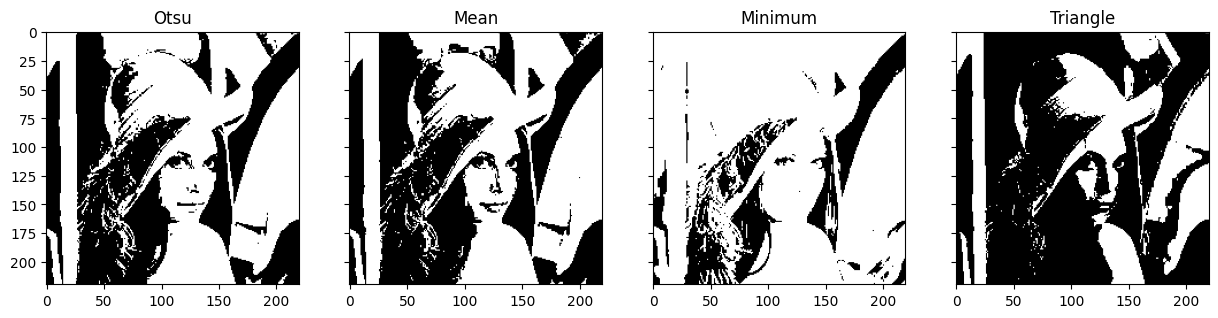

In [124]:
fig, axes = plt.subplots(ncols=4, sharex=True, sharey=True, figsize=(15, 15))

axes[0].imshow(binarizamento, cmap = 'gray')
axes[0].set_title('Otsu')
axes[1].imshow(binarizamento1, cmap = 'gray')
axes[1].set_title('Mean')
axes[2].imshow(binarizamento2, cmap = 'gray')
axes[2].set_title('Minimum')
axes[3].imshow(binarizamento3, cmap = 'gray')
axes[3].set_title('Triangle')

7) Aplique pelo menos 4 métodos diferentes ('skimage.filters') para calcular as bordas de uma imagem utilizando como entrada o resultado da questão anterior.

In [84]:
sob = sobel(cinza)
rob = roberts(cinza)
sch = scharr(cinza)
pre = prewitt(cinza)

Text(0.5, 1.0, 'Prewitt')

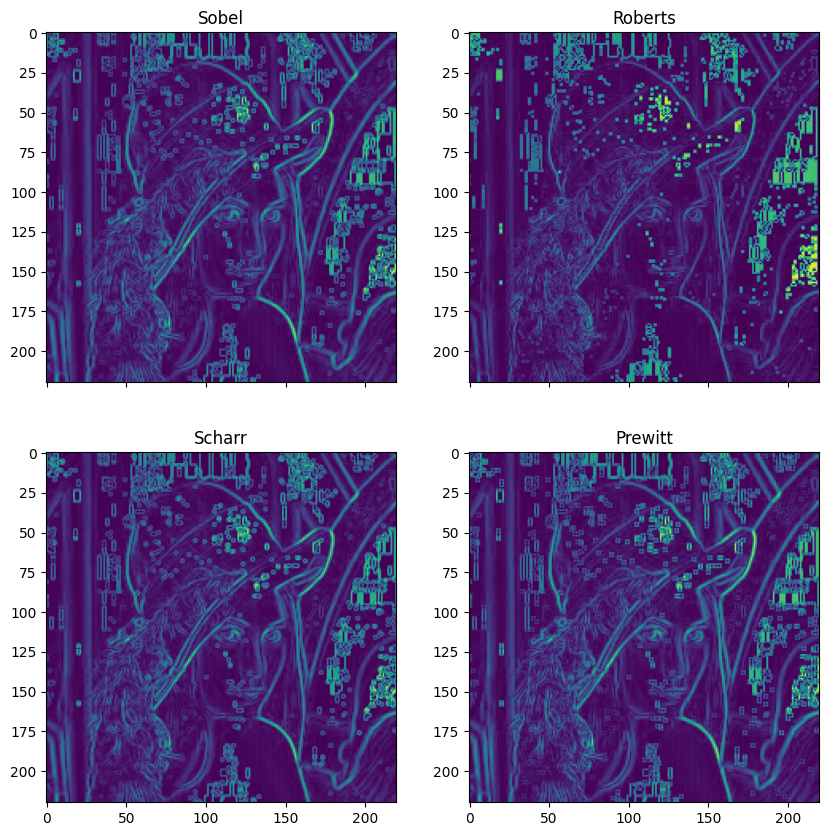

In [86]:
sob, rob, sch, pre = sobel(cinza), roberts(cinza), scharr(cinza), prewitt(cinza)

fig, ax = plt.subplots(2,2,figsize=(10, 10),sharex=True)
ax[0,0].imshow(sob)
ax[0,0].set_title('Sobel')
ax[0,1].imshow(rob)
ax[0,1].set_title('Roberts')
ax[1,0].imshow(sch)
ax[1,0].set_title('Scharr')
ax[1,1].imshow(pre)
ax[1,1].set_title('Prewitt')


8) Recorte uma imagem da seguinte forma:
- O corte será feito no canal de cor com a maior media de pixels.
- O centro do corte deve ser o pixel com o maior desvio padrão em uma janela 3x3.
- O tamanho do recorte será 1/4 do tamanho da imagem. Ex: Imagem 100 x 80 -> Recorte 25 x 20
- Cuidado com as bordas! Caso uma janela fique fora da imagem, o centro do recorte deverá ser alterado.

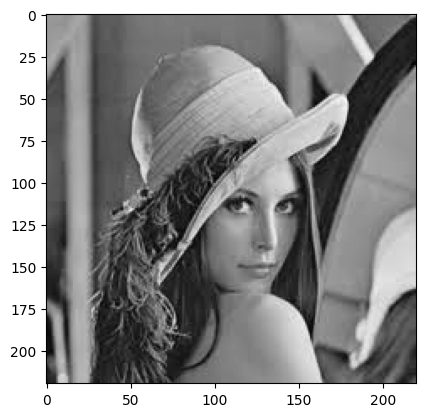

In [3]:
imagem = imread('lenna.jpg')
cinza = rgb2gray(imagem)
plt.imshow(cinza, cmap = 'gray')

In [4]:
red = imagem[:,:,0]
green = imagem[:,:,1]
blue = imagem[:,:,2]


linhasRed = red.shape[0]
colunasRed = red.shape[1]
linhasGreen = green.shape[0]
colunasGreen = green.shape[1]
linhasBlue = blue.shape[0]
colunasBlue = blue.shape[1]

In [7]:
valorTotalRed = 0
valorTotalGreen = 0
valorTotalBlue = 0
qtdRed = 0
qtdGreen = 0
qtdBlue = 0

for l in range(linhasRed):
  for c in range(colunasRed):
    valorTotalRed += red[l, c]
    qtdRed += 1


for l in range(linhasGreen):
  for c in range(colunasGreen):
    valorTotalGreen += green[l, c]
    qtdGreen += 1

for l in range(linhasBlue):
  for c in range(colunasBlue):
    valorTotalBlue += blue[l, c]
    qtdBlue += 1

print('Média Red: ', valorTotalRed/qtdRed)
print('Média Green: ', valorTotalGreen/qtdGreen)
print('Média Blue: ', valorTotalBlue/qtdBlue)

Média Red:  180.15568181818182
Média Green:  99.0380785123967
Média Blue:  105.4575


array([[[230, 134, 118],
        [230, 134, 118],
        [229, 133, 117],
        ...,
        [220, 132, 120],
        [231, 145, 132],
        [208, 122, 109]],

       [[229, 133, 117],
        [229, 133, 117],
        [229, 133, 117],
        ...,
        [227, 140, 131],
        [234, 147, 140],
        [214, 129, 122]],

       [[229, 133, 117],
        [229, 133, 117],
        [228, 133, 115],
        ...,
        [193, 109, 109],
        [177,  92,  95],
        [154,  69,  74]],

       ...,

       [[ 86,  22,  59],
        [ 92,  28,  65],
        [ 98,  30,  67],
        ...,
        [127,  43,  67],
        [141,  53,  75],
        [149,  60,  80]],

       [[ 82,  20,  59],
        [ 89,  25,  62],
        [ 95,  27,  64],
        ...,
        [140,  55,  78],
        [154,  65,  85],
        [162,  71,  89]],

       [[ 79,  19,  57],
        [ 86,  24,  61],
        [ 93,  25,  64],
        ...,
        [148,  63,  84],
        [163,  72,  90],
        [169,  76,  94]]